### Урок 5.

In [2]:
import numpy as np
from scipy import stats
from math import sqrt

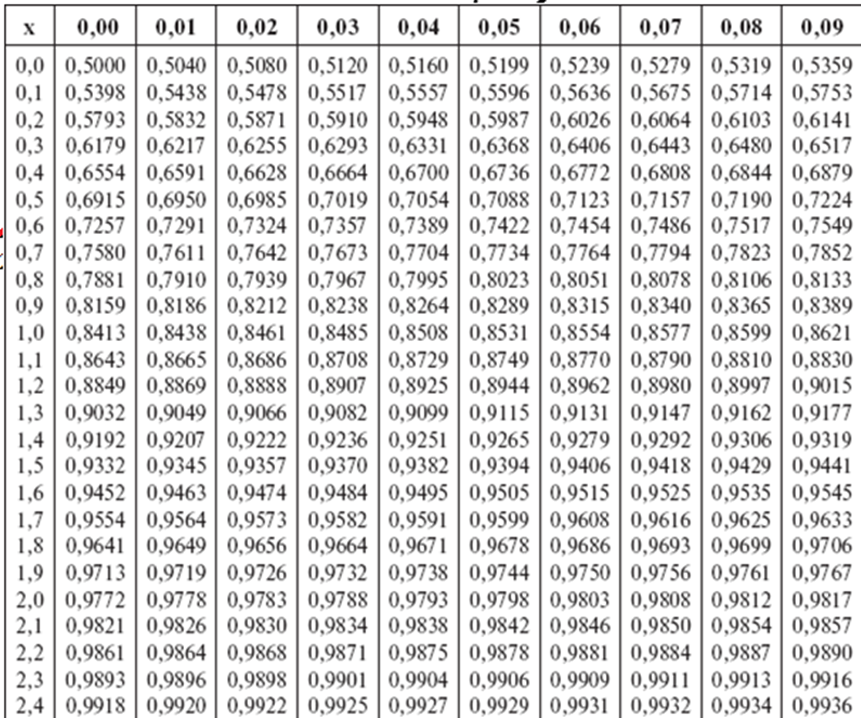


#### 1. Известно, что генеральная совокупность распределена нормально со средним квадратическим отклонением, равным 16. Найти доверительный интервал для оценки математического ожидания a с надежностью 0.95, если выборочная средняя M = 80, а объем выборки n = 256.



$$\sigma = 16$$

$$ n = 256 $$

$$X \pm Z_{\alpha/2} * \frac{\sigma}{\sqrt{n}} $$

$$ X = 80$$

$$ Z_{\alpha/2} = 1.96$$

$$ x1 = 80 - 1.96*\frac{16}{16} = 80 - 1.96 = 78.04 $$

$$ x2 = 80 + 1.96*\frac{16}{16} = 80 + 1.96 = 81.96 $$

$$Интервал =  [78.04; 81.96] $$

In [3]:
sigma = 16/sqrt(256)
mean = 80
confidence = 0.95

conf_int = stats.norm.interval(confidence, loc=mean, scale=sigma)
conf_int

(78.04003601545995, 81.95996398454005)

#### 2. В результате 10 независимых измерений некоторой величины X, выполненных с одинаковой точностью, получены опытные данные: 6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1 Предполагая, что результаты измерений подчинены нормальному закону распределения вероятностей, оценить истинное значение величины X при помощи доверительного интервала, покрывающего это значение с доверительной вероятностью 0,95.


In [4]:
data = np.array([6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1])
data

array([6.9, 6.1, 6.2, 6.8, 7.5, 6.3, 6.4, 6.9, 6.7, 6.1])

In [5]:
confidence=0.95

In [6]:
# mean, sigma = np.mean(data), np.std(data) #нужно использовать несмещенное, тут ошибка
# нужно использовать t коэффициенты, т.к. неизвестно std геерального распределения.
# критерий стьюдента 2.262


In [18]:
mean, sigma = np.mean(data), np.std(data, ddof=1)

In [19]:
mean

6.590000000000001

In [20]:
sigma

0.4508017549014448

In [21]:
t=2.262

In [22]:
left=mean-t*sigma/(len(data)**0.5)
left

6.267538255912426

In [23]:
right=mean+t*sigma/(len(data)**0.5)
right

6.912461744087575

In [24]:
# conf_int = stats.norm.interval(confidence, loc=mean, scale=sigma)
# conf_int

In [25]:
# X = (conf_int[0] + conf_int[1])/2
# X

#### 3. Проведите тест гипотезы. Утверждается, что шарики для подшипников, изготовленные автоматическим станком, имеют средний диаметр 17 мм. Используя односторонний критерий с α=0,05, проверить эту гипотезу, если в выборке из n=100 шариков средний диаметр оказался равным 17.5 мм, а дисперсия известна и равна 4 кв. мм.



In [26]:
mean = 17
alpha = 0.05
n = 100
X = 17.5
sigma = 4

Zt = 1.65

# Zn = (X - mean)/(sigma/sqrt(n))  #тут у меня ошибка
Zn = (X - mean)/(sqrt(sigma)/sqrt(n))  #правильное решение


print(f'Zn = {Zn}, Zt = {Zt}')

if Zn<Zt:
    print("Гипотеза верна, т.к. Zn < Zt")
else:
    print("Гиоптеза неверна, т.к. Zn > Zt")


Zn = 2.5, Zt = 1.65
Гиоптеза неверна, т.к. Zn > Zt


#### 4.Проведите тест гипотезы. Продавец утверждает, что средний вес пачки печенья составляет 200 г. Из партии извлечена выборка из 10 пачек. Вес каждой пачки составляет: 202, 203, 199, 197, 195, 201, 200, 204, 194, 190. Известно, что их веса распределены нормально. Верно ли утверждение продавца, если учитывать, что доверительная вероятность равна 99%? (Провести двусторонний тест.)

In [32]:
u = 200
n = 10
data = [202, 203, 199, 197, 195, 201, 200, 204, 194, 190]
mean = np.mean(data)
# sigma = np.std(data) #опять ошибка, должно быть несмещенное
sigma = np.std(data, ddof=1)

print(f'mean = {mean}, sigma = {sigma}')



conf = 0.99
alfa = 1 - 0.99

Zn = (mean - u)/((sigma)/sqrt(n))
print(f'|Zn| = {abs(Zn)}')

#2 сторонний

# t=3.25


mean = 198.5, sigma = 4.453463071962462
|Zn| = 1.0651074037450896


<img src="https://fsd.multiurok.ru/viewImage.php?image=http://nice-diplom.ru/templates/blue/images/img/form_69.gif">

In [33]:
k = n-1
k

9

In [34]:
Zt = 3.25
Zt


3.25

In [40]:
Zt = stats.t.ppf(1-alfa/2, len(data)-1)
Zt



3.2498355440153697

In [41]:
if abs(Zn)<Zt:
    print("Гипотеза верна, т.к. |Zn| < Zt")
else:
    print("Гиоптеза неверна, т.к. |Zn| > Zt")

Гипотеза верна, т.к. |Zn| < Zt


In [42]:
#stats.t.ppf
#stats.t.cdf
#stats.norm.ppf
#stats.norm.cdf

In [43]:
stats.ttest_1samp(data, u)

Ttest_1sampResult(statistic=-1.0651074037450896, pvalue=0.31456660352472854)